ابتدا باید کتاب خانه 

nashpy  

را نصب کنیم

In [3]:
!pip install nashpy

با  چند دستور ابتدایی این کتابخانه شروع میکنیم و آنها را توضیح میدهیم ...

در این قسمت هر دو جدول بازیکن سطر وستون با یکدیگر برابر هستند

In [4]:
import nashpy as nash
import numpy as np
A = np.array([[0, -1, 1], [1, 0, -1], [-1, 1, 0]])
rps = nash.Game(A)
print(rps)

Zero sum game with payoff matrices:

Row player:
[[ 0 -1  1]
 [ 1  0 -1]
 [-1  1  0]]

Column player:
[[ 0  1 -1]
 [-1  0  1]
 [ 1 -1  0]]


اگر ماتریس های دو بازیکن با یکدیگر برابر نباشند به صورت زیر میتوانیم انجام دهیم

In [5]:
B =np.array([[1, 0, 1], [1, 1, -1], [-1, 1, -1]])
rps = nash.Game(A, B)
print(rps)

Bi matrix game with payoff matrices:

Row player:
[[ 0 -1  1]
 [ 1  0 -1]
 [-1  1  0]]

Column player:
[[ 1  0  1]
 [ 1  1 -1]
 [-1  1 -1]]


برای به دست آوردن یوتیلیتی یک استراتژی از جدول به صورت زیر انجام میدهیم

In [6]:
sigma_r = [0, 0, 1]
sigma_c = [0, 1, 0]
print(rps[sigma_r, sigma_c])

[1 1]


حال میخواهیم با استفاده از این کتابخانه نقطه(نقاط) تعادل نش بازی سنگ کاغذ قیجی را که در قسمت اول دیدید را پیدا کنیم.
یک بار با استفاده از

game.support_enumeration 

و بارهای دیگر با استفاده از 

game.vertex_enumeration , Lemke Howson

کد را پیاده سازی کنید. 
و در پایان با جستجو در اینترنت بگویید که تفاوت عملکرد این سه در جیست و خروجی هر سه را با هم مقایسه کنید.
آیا خروجی یا 

pure strategy 


است یا

 mixed strategy?


#### game.support_enumeration :

For a non-degenerate 2-player game $(A, B) \in \mathbb{R}^{m\times n}$, the following algorithm returns all pairs of best responses:

1. For all $1 \leq k \leq \min(m, n)$:
2. For all pairs of support $(I, J)$ with $|I| = |J| = k$.
3. Solve the following equations (this ensures we have best responses):

   $\sum_{i \in I} \sigma_{r i} B_{i j}$ = $v ~ for ~ all ~ j \in J $ 
   
    $\sum_{j \in J} A_{i j} \sigma_{c j}$ = $u ~ for ~ all ~ i \in I $ 
    
    
4. Solve: 

    $ \sum_{i=1}^{m} \sigma_{r_i} = 1$ and $\sigma_{r_i} \geq 0$ for all $i$ 
    
    $ \sum_{j=1}^{n} \sigma_{c_j} = 1$ and $\sigma_{c_j} \geq 0$ for all $j$ 
    
   
5. Check the best response condition.
Repeat steps 3, 4, and 5 for all potential support pairs.

##### let's go through the steps of the algorithm:

Step 1: For all possible sizes of supports, from 1 to the minimum of $m$ and $n$ (since the size of a support cannot exceed the number of available strategies for each player), the algorithm will consider potential pairs of supports.

Step 2: For each combination of supports $(I, J)$, where $|I| = |J| = k$, the algorithm will move on to the next step.

Step 3: The algorithm tries to find mixed strategies $\sigma_r$ and $\sigma_c$ for player $R$ and player $C$, respectively, such that they are best responses to each other.

For player $R$, the mixed strategy $\sigma_r$ assigns probabilities to the strategies in support $I$.
For player $C$, the mixed strategy $\sigma_c$ assigns probabilities to the strategies in support $J$.
The equations represent the best response conditions. For each player, they ensure that the expected payoff for their chosen strategies matches the opponent's chosen strategies. These equations represent a system of linear equations.

Step 4: The algorithm now solves another set of equations to find the probabilities for the mixed strategies.

The first equation ensures that the probabilities assigned to the strategies in support $I$ by player $R$ sum up to 1.
The second equation ensures that the probabilities assigned to the strategies in support $J$ by player $C$ sum up to 1.

Step 5: Check the best response condition. The algorithm verifies if the probabilities found in Step 4 indeed represent best responses for the players. This means checking if the computed mixed strategies maximize the expected payoffs given the strategies of the other player.

Step 6: The algorithm repeats Steps 3, 4, and 5 for all potential pairs of supports $(I, J)$ with the specified size $(k)$.

By following these steps for all possible combinations, the algorithm enumerates all pairs of best responses for the given non-degenerate 2-player game $(A, B)$.

#### code:

In [7]:
# rock paper scissors
A = np.array([[0,-1,1], [1,0,-1], [-1,1,0]])
rps = nash.Game(A)
eqs = rps.support_enumeration()
list(eqs)

[(array([0.33333333, 0.33333333, 0.33333333]),
  array([0.33333333, 0.33333333, 0.33333333]))]

#### game.vertex_enumeration:

The algorithm is as follows:
For a nondegenerate 2 player game $(A, B) \in \mathbb{R}^{m\times n^2}$ the following algorithm returns all nash equilibria:
1. Obtain the best response Polytopes $P$ and $Q$
2. For all pairs of vertices of $P$ and $Q$
3. Check if the pair is fully labeled and return the normalised probability vectors.
Repeat steps 2 and 3 for all pairs of vertices.


In [8]:
eqs = rps.vertex_enumeration()
list(eqs)

[(array([0.33333333, 0.33333333, 0.33333333]),
  array([0.33333333, 0.33333333, 0.33333333]))]

#### Lemke Howson:

The algorithm is as follows:
For a nondegenerate 2 player game $(A,B) \in \mathbb{R}^{m \times n^2}$ the following algorithm returns a single Nash equilibria:
1. Obtain the best response Polytopes $P$ and $Q$.
2. Choose a starting label to drop, this will correspond to a vertex of $P$ or $Q$.
3. In that polytope, remove the label from the corresponding vertex and move to the vertex that shared that label. A new label will be picked up and duplicated in the other polytope.
4. In the other polytope drop the duplicate label and move to the vertex that shared that label.
Repeat steps 3 and 4 until there are no duplicate labels.



In [9]:
eqs = rps.lemke_howson(0)
list(eqs)

[array([0.33333333, 0.33333333, 0.33333333]),
 array([0.33333333, 0.33333333, 0.33333333])]

#### Comparison:

There are three methods provided by Nashpy to calculate Nash equilibria: support enumeration, vertex enumeration, and the Lemke-Howson algorithm. Support enumeration exhaustively searches through all possible combinations of strategies to find Nash equilibria, while vertex enumeration specifically looks for pure strategy Nash equilibria by traversing through the vertices of the strategy polytope. The Lemke-Howson algorithm is an iterative algorithm used to solve the linear complementarity problem associated with a game. It efficiently finds and traverses through the vertices of the best response polytopes to find Nash equilibria. 

For games with multiple Nash equilibria, support enumeration guarantees finding all Nash equilibria (both pure and mixed), while vertex enumeration finds all pure strategy Nash equilibria but not necessarily mixed strategy equilibria. The Lemke-Howson algorithm finds at least one Nash equilibrium if it exists but won’t necessarily find all Nash equilibria. Support enumeration can be computationally expensive, especially for large games, while vertex enumeration is generally faster since it focuses on pure strategies. The complexity of the Lemke-Howson algorithm can vary depending on the properties of the game, but it is efficient for certain classes of games. 

In summary, support enumeration and vertex enumeration provide exhaustive or partial enumeration of Nash equilibria, respectively, but can be computationally demanding. The Lemke-Howson algorithm provides an efficient method to find specific equilibria. The choice of method depends on the specific requirements of the game and the desired level of completeness. For Rock Paper Scissors, which has no pure strategy Nash equilibria, mixed strategies must be used, and both support enumeration and the Lemke-Howson algorithm can be used to find the Nash equilibrium.


همانطور که میبینیم آخرین دو آرایه آخر ایندکس های غیر صحیح دارند که این دو عبارتند از نقاط تعادل میکس شده .
که همان عبارت احتمالی برای انتخاب استراتژی مورد قبول یک فرد را میدهند.

برای چک کردن این که یک استراتژی بهترین جواب است  از کد زیر استفاده میکنیم.

In [10]:
sigma_r = np.array([0, 1, 0])
sigma_c = np.array([1, 0, 0])
print(rps.is_best_response(sigma_r, sigma_c))

(True, False)



ابتدا درباره مساله 

matching pennies 

تحقیق کنید.
اگر بخواهیم چند بار انتخاب استراتژی انجام بگیرد، کدی بنویسید که تکرار عملیات صورت بگیرد
تعداد تکرار را برابر 2 رد نظر بگیرید. 
ماتریس بازی را نمایش دهید.

### Matching Pennies: 

Matching Pennies is a two-player zero-sum game in which each player chooses between two options, commonly represented by heads or tails of a coin. The payoff for each player depends on the outcome of the coin toss, where one player wins if the outcomes match (i.e., both players choose the same option), and the other player wins if the outcomes differ. Consider two players who can choose to display a coin either Heads facing up or Tails facing up. If both players show the same face then player 1 wins, if not then player 2 wins. Winning corresponds to a numeric value of 1 and losing a numeric value of -1.

Here is an example of the payoff matrix for Matching Pennies:

|   | Heads | Tails |
|---|-------|-------|
| Heads | 1,-1 | -1,1 |
| Tails | -1,1 | 1,-1 |

In this matrix, the row player chooses either Heads or Tails, while the column player also chooses either Heads or Tails. If the two players choose the same option, then the row player wins 1 and the column player loses 1. If the two players choose different options, then the row player loses 1 and the column player wins 1.

Matching Pennies is a game of complete information, meaning that both players know the payoff matrix and the available strategies of their opponent. It is also a symmetric game, as the payoffs are the same for each player regardless of which player chooses which strategy.

Matching Pennies is often used as a simple example to introduce game theory concepts such as pure and mixed strategies, Nash equilibria, and the minimax theorem. It is also used in cryptography and computer science as a method for generating random numbers.

In Matching Pennies, a pure strategy is when a player always chooses the same option, but there is no pure strategy Nash equilibrium in this game. Instead, the Nash equilibrium is a mixed strategy, where each player chooses each option with equal probability of 0.5. In a mixed strategy, a player randomizes between different actions with certain probabilities. In Matching Pennies, each player chooses Heads and Tails with equal probability to achieve the Nash equilibrium.


In [12]:
import nashpy.repeated_games
A = np.array([[1, -1], [-1, 1]])
matching_pennies = nash.Game(A)
repeated_matching_pennies = nash.repeated_games.obtain_repeated_game(game=matching_pennies, repetitions=2)
print(repeated_matching_pennies)

Zero sum game with payoff matrices:

Row player:
[[ 2.  2.  2. ...  0. -2. -2.]
 [ 2.  2.  2. ...  0. -2. -2.]
 [ 2.  2.  2. ...  0. -2. -2.]
 ...
 [ 0.  0.  0. ...  2.  0.  2.]
 [-2. -2. -2. ...  0.  2.  0.]
 [-2. -2. -2. ...  2.  0.  2.]]

Column player:
[[-2. -2. -2. ...  0.  2.  2.]
 [-2. -2. -2. ...  0.  2.  2.]
 [-2. -2. -2. ...  0.  2.  2.]
 ...
 [ 0.  0.  0. ... -2.  0. -2.]
 [ 2.  2.  2. ...  0. -2.  0.]
 [ 2.  2.  2. ... -2.  0. -2.]]


حال اگر بخواهیم تعداد تکرار ها را بیشتر کنیم چه؟
برای تکرار های بیشتر این روش محاسبات زیادی میخواهد بجایش از روش های لرنینگ استفاده میکنیم.


در زیر الگوریتم فیکتس

game.fictitious_play

یکی از روش های لرن کردن میباشد.
البته همیشه این الگوریتم همگرا نمیشود 

### Fictitious Play:

Fictitious Play is an iterative algorithm used to find approximate solutions to two-player sequential games with perfect information. In this algorithm, each player repeatedly updates their strategy based on their opponent's past actions, assuming that the opponent plays according to a fixed mixed strategy. Players fictitiously "play" their strategies against the believed strategies of their opponents in a self-reinforcing process. Over time, the strategy profiles converge to a Nash equilibrium, which is a stable point where neither player has an incentive to unilaterally change their strategy.

more about algorithm:
The Fictitious Play algorithm is an iterative procedure that allows two players to play a sequential game repeatedly, updating their strategies based on their beliefs about their opponent's strategies. Here are the steps of the algorithm:

1. **Initialize Strategies:** Start by initializing the strategies of both players. These strategies can be any valid probability distributions over the players' action spaces. For example, in a simple game like "Rock Paper Scissors," each player could start with an equal probability of playing Rock, Paper, or Scissors.

2. **Play the Game:** In each iteration of the algorithm, both players simultaneously choose their actions based on their current strategy distributions. The players do not know the opponent's true strategy but assume they are playing according to their current belief (probability distribution) over their opponent's actions.

3. **Observe Payoffs:** After both players have chosen their actions, they observe the outcomes and payoffs of the game. The payoff is the utility or reward each player receives based on the combination of actions played by both players.

4. **Update Beliefs:** Using the observed payoffs, each player updates their beliefs about their opponent's strategy. Players believe that their opponents will choose actions with probabilities proportional to the frequencies with which the opponent has played those actions in the past iterations.

5. **Update Strategies:** After updating their beliefs, both players adjust their own strategies. Each player chooses the action with the highest expected payoff given their current belief about their opponent's strategy. This is known as a "best response" strategy update.

6. **Repeat:** Steps 2 to 5 are repeated for a certain number of iterations or until convergence criteria are met. The players continue playing the game and updating their strategies based on observed payoffs and updated beliefs.

7. **Convergence:** In some cases, the algorithm may converge to a stable point where both players' strategies no longer change significantly, and they reach a Nash equilibrium. In a Nash equilibrium, neither player has an incentive to unilaterally change their strategy given the other player's strategy.

8. **Result:** The final strategies after convergence (or after a fixed number of iterations) are considered the approximate Nash equilibrium of the game.

It's important to note that Fictitious Play is not guaranteed to converge to a Nash equilibrium for all games, especially for games with complex strategies or multiple equilibria. The algorithm's success depends on the structure of the game and the initial strategy choices of the players. Nonetheless, it is a useful heuristic to find approximate equilibria in certain scenarios.

**Convergence of Fictitious Play:**
The Fictitious Play algorithm converges to a Nash equilibrium under certain conditions:

1. **Zero-Sum Games:** Fictitious Play converges to a Nash equilibrium for two-player zero-sum games (e.g., matrix games) in finite time.

2. **Symmetric Games:** In symmetric games (where both players have identical strategies and payoffs), Fictitious Play can converge to a Nash equilibrium.

3. **Concave Games:** For concave games, where players' payoff functions are concave in their own strategies and convex in the opponents' strategies, Fictitious Play converges to a Nash equilibrium.

4. **Bounded Rationality:** Fictitious Play is robust to bounded rationality, where players use mixed strategies and do not compute optimal responses perfectly.

However, Fictitious Play does not guarantee convergence for all games. For certain games, it may converge to a Nash equilibrium that is not necessarily the globally optimal one, or it may not converge at all. The algorithm's convergence behavior is highly dependent on the game's structure, initial beliefs, and players' strategies.

Overall, while Fictitious Play is a simple and intuitive algorithm, it may not always find the best Nash equilibrium, and alternative methods like Lemke-Howson, support_enumeration, or vertex_enumeration might be used for more reliable results in complex games.


In [19]:
A = np.array([[0, 1, 0], [0, 0, 1], [1, 0, 0]])
B = np.array([[0, 0, 1], [1, 0, 0], [0, 1, 0]])
game = nash.Game(A, B)
iterations = 10000
np.random.seed(0)
play_counts = tuple(game.fictitious_play(iterations=iterations))
play_counts[-1]

[array([5464., 1436., 3100.]), array([2111., 4550., 3339.])]

در مساله فوق اعداد آرایه

play_counts 

باید بر تعداد 

iteration 

تقسیم کنید تا احتمال هر استراتژی بدست بیاید و خروجی را نشان دهید.
و در نهایت احتمال هر استراتژی را برای بازیکن اول
row player
را نسبت به  

.iterations

پلاتد کنید
آیا الگوریتمها همگرا میشوند؟ توضیح دهید...
 
 
 
شما صرفا باید به روش گفته شده ptobabilities 
را بصورت مناسب تعریف کنید ...

/var/folders/w1/6xdwk4ls5nb4d1hy_mlzx5380000gn/T/ipykernel_8784/2772940724.py:4: RuntimeWarning: invalid value encountered in divide
  probabilities = [play_counts_row / sum(play_counts_row) for play_counts_row, _ in play_counts]


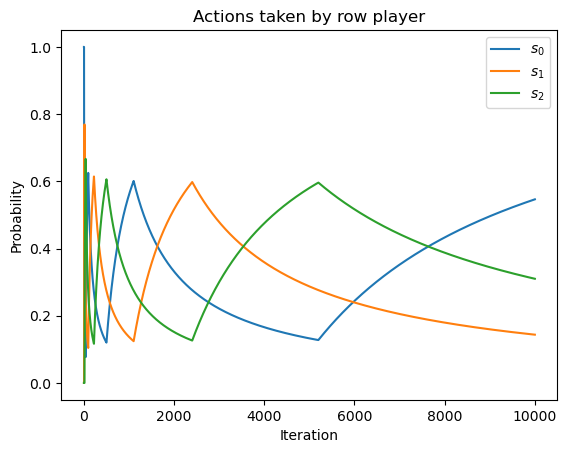

In [20]:
import matplotlib.pyplot as plt
plt.figure() 

probabilities = [play_counts_row / sum(play_counts_row) for play_counts_row, _ in play_counts]

for number, strategy in enumerate(zip(*probabilities)):
    plt.plot(strategy, label=f"$s_{number}$")  

    
    
plt.xlabel("Iteration")  
plt.ylabel("Probability")  
plt.title("Actions taken by row player")  
plt.legend() 

### Algorithm Is Not Converging

این بار برای ماتریس های

A , B

همان الگوریتم قبلی را تکرار کنید و نشان دهید که این بار برای بازیکن دوم الگوریتم ها همگرا میشوند

In [21]:
A = np.array([[1 / 2, 1, 0], [0, 1 / 2, 1], [1, 0, 1 / 2]])
B = np.array([[1 / 2, 0, 1], [1, 1 / 2, 0], [0, 1, 1 / 2]])
game = nash.Game(A, B)
np.random.seed(0)
play_counts = tuple(game.fictitious_play(iterations=iterations))
play_counts[-1]

[array([3290., 3320., 3390.]), array([3356., 3361., 3283.])]

/var/folders/w1/6xdwk4ls5nb4d1hy_mlzx5380000gn/T/ipykernel_8784/1155347935.py:4: RuntimeWarning: invalid value encountered in divide
  probabilities = [play_counts_column / sum(play_counts_column) for _, play_counts_column in play_counts]


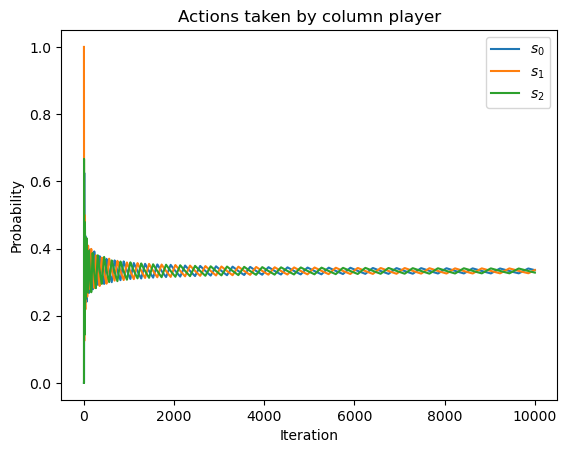

In [22]:
import matplotlib.pyplot as plt
plt.figure()

probabilities = [play_counts_column / sum(play_counts_column) for _, play_counts_column in play_counts]

for number, strategy in enumerate(zip(*probabilities)):
    plt.plot(strategy, label=f"$s_{number}$")



plt.xlabel("Iteration")
plt.ylabel("Probability")
plt.title("Actions taken by column player")
plt.legend()

### Algorithm Is Converging

حال میخواهیم ببینیم یک بازیکن در گذر زمان چه احتمالی از استراتژی ها را بازی میکند.
 با استفاده از الگوریتم 

replicator dynamics

برای ماتریس های  هزینه َA,
این کار را انجام دهید.
( البته پیش از این کار همانند قسمت قبل 
احتمال هر استراتژی را برای بازیکن اول و دوم پلات بگیرید)

### Replicator Dynamics :

The Replicator Dynamics algorithm is a continuous-time dynamics algorithm used to study the evolution of strategies in games. It models the strategic interactions between players in a population and describes how the proportions of different strategies change over time. Here are the steps of the Replicator Dynamics algorithm:

1. **Initialize Strategies:** Start with an initial distribution of strategies for each player. These initial strategy proportions could be chosen randomly or uniformly from a valid probability distribution, representing the players' initial beliefs about which strategies to play.

2. **Calculate Payoffs:** For each player, calculate the expected payoff (or utility) they would receive from each strategy, given the current strategy proportions of both players. Payoffs are determined based on the game's payoff matrix, which defines the rewards or outcomes for each combination of strategies played by the players.

3. **Average Payoff:** Compute the average payoff for each player over all strategies. This average is taken across all the strategies in the population and represents the overall performance of each player relative to the others.

4. **Update Strategy Proportions:** Update the strategy proportions for each player using the replicator dynamics equation:

   ```
   x_i' = x_i * (payoff_i - average_payoff)
   ```

   where `x_i` is the current strategy proportion of player i, `payoff_i` is the payoff player i receives from their current strategy, and `average_payoff` is the average payoff of all players in the population.

   The replicator dynamics equation reflects the intuition that strategies with higher payoffs will become more prevalent in the population, while strategies with lower payoffs will decrease in frequency.

5. **Normalization:** After updating the strategy proportions, normalize them to ensure they remain valid probability distributions. This step is essential to maintain the interpretability of the strategy proportions as probabilities.

6. **Iterate:** Repeat steps 2 to 5 continuously over time or until convergence. The algorithm simulates the evolution of strategies over time, and the strategy proportions of each player change dynamically based on their current payoffs and the average payoffs in the population.

7. **Convergence:** In many cases, the Replicator Dynamics algorithm converges to a stable point known as an evolutionarily stable strategy or an equilibrium. At this point, the strategy proportions no longer change significantly, and the population reaches a stable configuration where no player can unilaterally improve their payoff by changing their strategy.

It's important to note that the Replicator Dynamics algorithm provides insights into the evolutionary dynamics of strategies in a population. However, the algorithm does not guarantee convergence to a Nash equilibrium, especially in games with multiple equilibria or complex dynamics. Nonetheless, it is a valuable tool for studying the long-term behavior of strategies in various games and evolutionary scenarios.

The replicator_dynamics method returns the strategies of the row player over time:

In [37]:
import nashpy as nash
import numpy as np
A = np.array([[3, 2], [4, 2]])
B = np.array([[1, 3], [2, 4]])
game = nash.Game(A,B)


In [38]:
game.replicator_dynamics()

array([[0.5       , 0.5       ],
       [0.49875032, 0.50124968],
       [0.49750377, 0.50249623],
       ...,
       [0.10199196, 0.89800804],
       [0.10189853, 0.89810147],
       [0.10180527, 0.89819473]])

It is also possible to pass a y0 variable in order to assign a starting strategy. Otherwise the probability is divided equally amongst all possible actions. Passing a timepoints variable gives the algorithm a sequence of timepoints over which to calculate the strategies:

In [39]:
y0 = np.array([0.9, 0.1])
timepoints = np.linspace(0, 10, 1000)
result = game.replicator_dynamics(y0=y0, timepoints=timepoints)

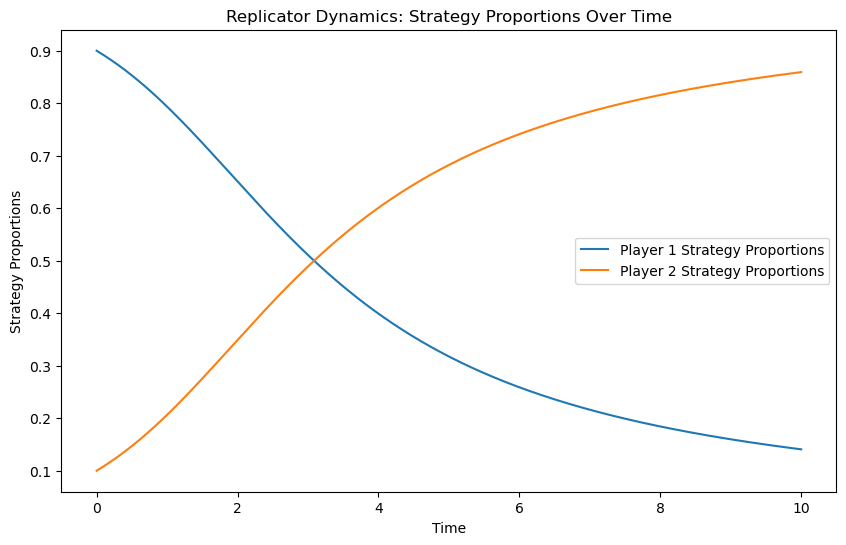

In [40]:
# Extract the strategy proportions for both players over time
x1_history = result[:, 0]
x2_history = result[:, 1]

# Plot the strategy proportions over time
plt.figure(figsize=(10, 6))
plt.plot(timepoints, x1_history, label='Player 1 Strategy Proportions')
plt.plot(timepoints, x2_history, label='Player 2 Strategy Proportions')
plt.xlabel('Time')
plt.ylabel('Strategy Proportions')
plt.title('Replicator Dynamics: Strategy Proportions Over Time')
plt.legend()
plt.show()

**source:** https://readthedocs.org/projects/nashpy/downloads/pdf/latest/